In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23')

Text(0.5, 0, 'Year-Month')

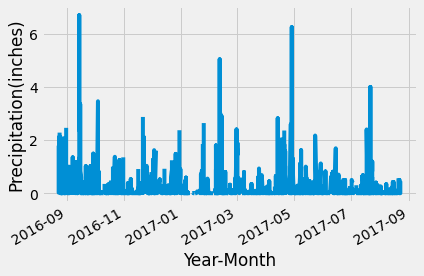

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = dt.date(2017,8, 23)

# Calculate the date one year from the last date in data set.
one_year =  most_recent - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precipitation_q = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame 
precipitation_df = pd.DataFrame(precipitation_q).rename(columns = {'prcp': 'precipitation'})

# Cast the dates  datetime 

precipitation_df['date']= pd.to_datetime(precipitation_df['date'], format = '%Y-%m-%d')
   

#set the index to the date column

precipitation_df = precipitation_df.set_index('date')

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by = ["date"])

# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot()
plt.legend().remove()
plt.ylabel('Precipitation(inches)')
plt.xlabel('Date')

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
len(session.query(Station).all())


9

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
ordered_stations = session.query(measurement.station,
                   func.count(measurement.id)).group_by(measurement.station)
                   .order_by(func.count(measurement.id).desc()).all()
ordered_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station, 
      func.min(measurement.tobs),
      func.max(measurement.tobs),
      func.avg(measurement.tobs)]
ma_query= session.query(*sel).filter_by(station = "USC00519281").all()

ma_query

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

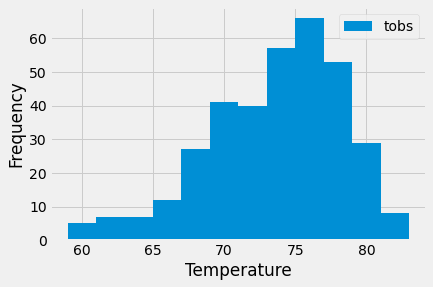

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12 = session.query(measurement.date, measurement.tobs).filter_by(station = "USC00519281").\
    filter(measurement.date >= one_year).all()

last_12_df = pd.DataFrame(last_12)
last_12_df.plot(kind = "hist", bins = 12)
plt.xlabel('Temperature')

# Close session

In [42]:
# Close Session
session.close()